# 监督学习算法

## 模拟数据集

### 二分类 forge 数据集

In [1]:
import warnings
import matplotlib.pyplot as plt
import mglearn

# 忽略警告
warnings.filterwarnings('ignore')

# 构造 二分类forge数据集
X, y = mglearn.datasets.make_forge()

print('shape of X:', X.shape)
print('shape of y:', y.shape)

# 绘制散点图

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')

/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


shape of X: (26, 2)
shape of y: (26,)


/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

### 回归 wave 数据集

shape of X: (40, 1)
shape of y (40,)


Text(0, 0.5, 'Target')

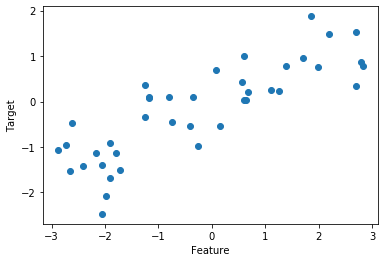

In [2]:
# 准备数据
X, y = mglearn.datasets.make_wave(n_samples=40)

print('shape of X:', X.shape)
print('shape of y', y.shape)

# 绘制散点图

plt.plot(X, y, 'o')
plt.xlabel('Feature')
plt.ylabel('Target')

## KNN 算法

### KNN 分类

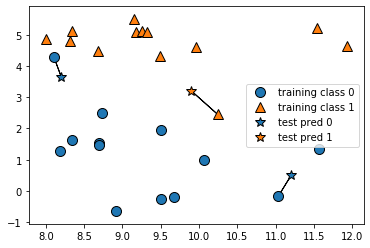

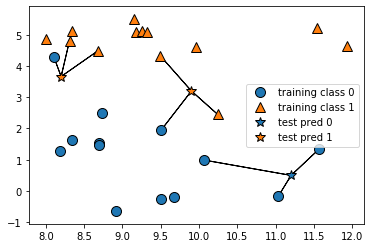

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

### 使用 KNN 分类 forge 数据集

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# 构造 二分类forge数据集
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

shape of X_train: (19, 2)
shape of X_test: (7, 2)
shape of y_train: (19,)
shape of y_test: (7,)
1.0


### 查看分类决策 边界

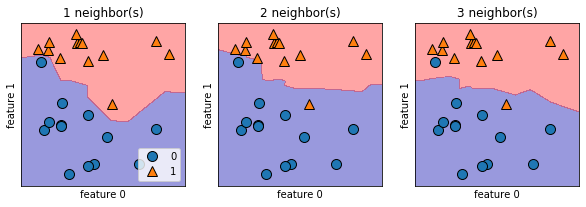

In [5]:
fig, axis = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,2,3], axis):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axis[0].legend(loc=4)

### 在新数据集上验证模型效果与 近邻数量的关系

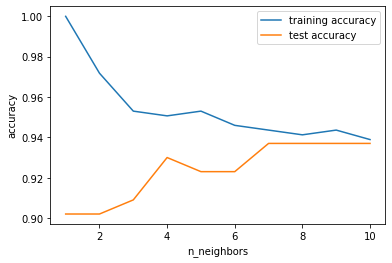

In [6]:
from sklearn.datasets import load_breast_cancer

canser_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser_data.data, canser_data.target, random_state=2)

neibors_setting = range(1,11)
train_acc = []
test_acc = []

for n_neighbors in neibors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(neibors_setting, train_acc, label='training accuracy')
plt.plot(neibors_setting, test_acc, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

### KNN 回归

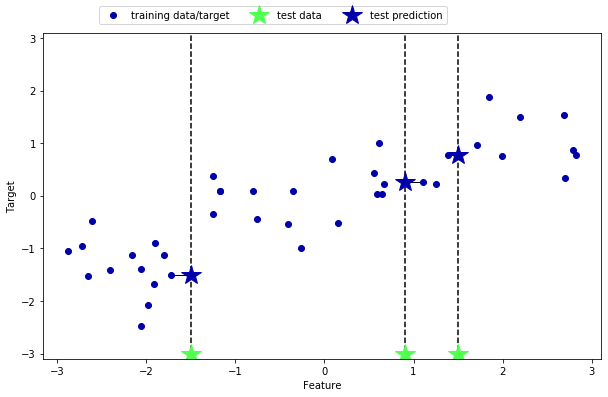

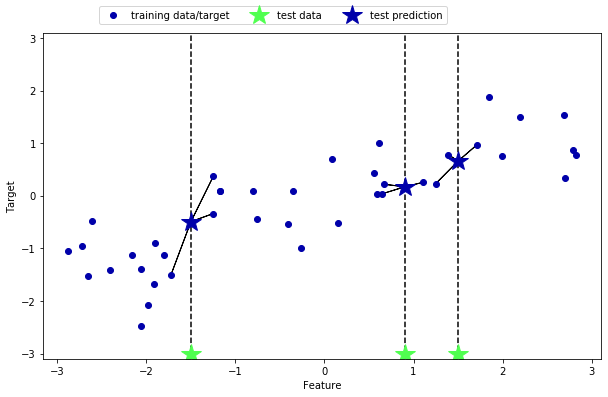

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

### 使用KNN 回归 wave 数据集

In [8]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('y_test:', y_test)
print('y_pred:', y_pred)

print('predict R^2 score:', reg.score(X_test, y_test))

y_test: [ 0.43655826  0.09398858 -1.38773632 -0.90496988 -1.13455014  0.21778193
 -2.08581717  1.49417157  0.08448544  0.7789638 ]
y_pred: [ 0.35686046 -0.65851598 -1.75656248 -1.88623129 -1.88623129  0.35686046
 -1.75656248  1.19926374  0.04220323  0.91241374]
predict R^2 score: 0.7732425944575221


### 查看回归曲线

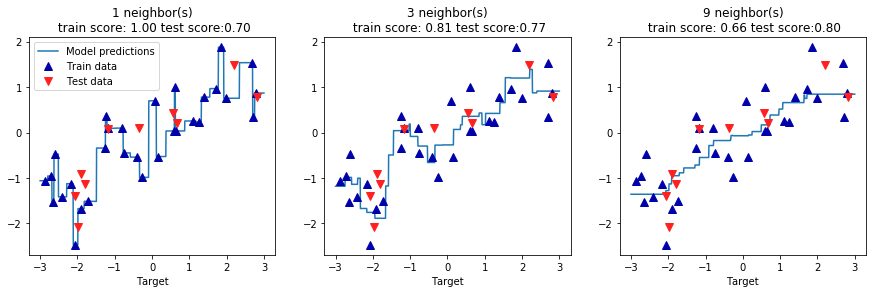

In [9]:
import mglearn
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 创建数据点
line = np.linspace(-3, 3, 1000).reshape(1000, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score:{:.2f}'.format(n_neighbors,
                                                                                reg.score(X_train, y_train),
                                                                                reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_xlabel('Target')
    
axes[0].legend(['Model predictions', 'Train data', 'Test data'])
plt.show()

## 线性模型

### 线性模型预测 wave 数据集

w[0]: 0.393906  b: -0.031804


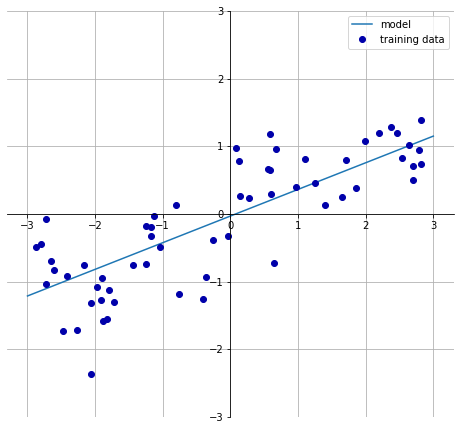

In [10]:
mglearn.plots.plot_linear_regression_wave()

### 线性回归（最小二乘法） 训练模型

模型简单，欠拟合

In [11]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

lr.coef_: [0.39001024]
lr.intercept_: -0.10023808171438695
Training set score: 0.5806893881260262
Test set score: 0.8323312763209392


处理波士顿房价数据集，维数较高，过拟合

In [12]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

Training set score: 0.9520519609032728
Test set score: 0.6074721959665987


### 岭回归实现正则化

In [13]:
from sklearn.linear_model import Ridge

ridge1 = Ridge().fit(X_train, y_train)

print('ridge alpha=1:')
print('Training set score:', ridge1.score(X_train, y_train))
print('Test set score:', ridge1.score(X_test, y_test))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('ridge alpha=10:')
print('Training set score:', ridge10.score(X_train, y_train))
print('Test set score:', ridge10.score(X_test, y_test))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('ridge alpha=0.1:')
print('Training set score:', ridge01.score(X_train, y_train))
print('Test set score:', ridge01.score(X_test, y_test))

ridge alpha=1:
Training set score: 0.885796658517094
Test set score: 0.7527683481744751
ridge alpha=10:
Training set score: 0.7882787115369614
Test set score: 0.6359411489177309
ridge alpha=0.1:
Training set score: 0.9282273685001989
Test set score: 0.7722067936479815


### 训练参数分析

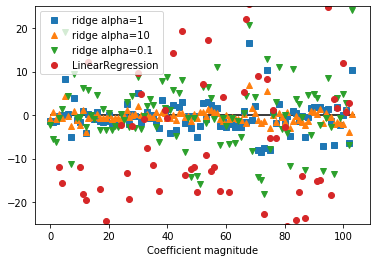

In [14]:
plt.plot(ridge1.coef_, 's', label='ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('Coefficient index')
plt.xlabel('Coefficient magnitude')

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### 岭回归和线性回归的学习曲线

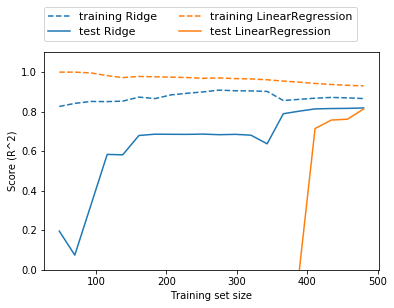

In [15]:
mglearn.plots.plot_ridge_n_samples()

### lasso 回归

lasso alpha=1:
Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of features used: 4
lasso alpha=0.01:
Training set score: 0.8962226511086497
Test set score: 0.7656571174549982
Number of features used: 33
lasso alpha=0.0001:
Training set score: 0.9507158754515463
Test set score: 0.643746742127282
Number of features used: 96


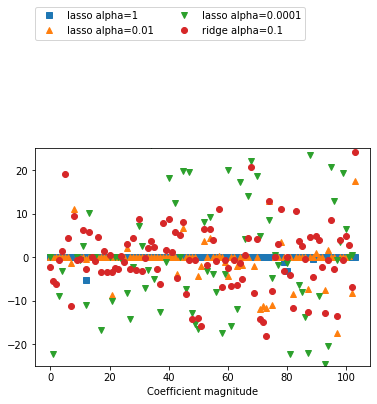

In [16]:
from sklearn.linear_model import Lasso

lasso1 = Lasso().fit(X_train, y_train)

print('lasso alpha=1:')
print('Training set score:', lasso1.score(X_train, y_train))
print('Test set score:', lasso1.score(X_test, y_test))
print('Number of features used:', np.sum(lasso1.coef_ != 0))
print('='*40)

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('lasso alpha=0.01:')
print('Training set score:', lasso001.score(X_train, y_train))
print('Test set score:', lasso001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso001.coef_ != 0))
print('='*40)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('lasso alpha=0.0001:')
print('Training set score:', lasso00001.score(X_train, y_train))
print('Test set score:', lasso00001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso00001.coef_ != 0))
print('='*40)

plt.plot(lasso1.coef_, 's', label='lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='ridge alpha=0.1')

plt.xlabel('Coefficient index')
plt.xlabel('Coefficient magnitude')

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.5))

### 线性分类器 logistic 回归与SVM

logistic回归与线性SVM 

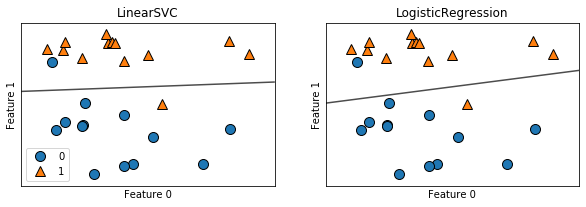

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

正则化系数 c 值效果

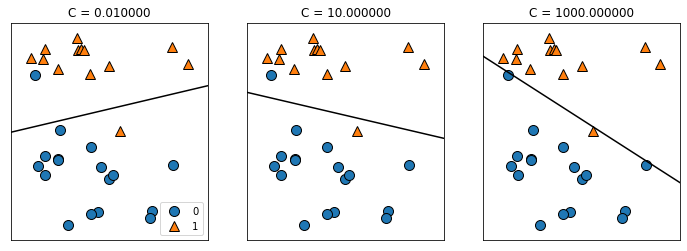

In [18]:
mglearn.plots.plot_linear_svc_regularization()

#### 乳腺癌数据集上的模型分析

Training set score: 0.960093896713615
Test set score: 0.9440559440559441
Number of features used: 30
Training set score: 0.9741784037558685
Test set score: 0.958041958041958
Training set score: 0.9389671361502347
Test set score: 0.9300699300699301


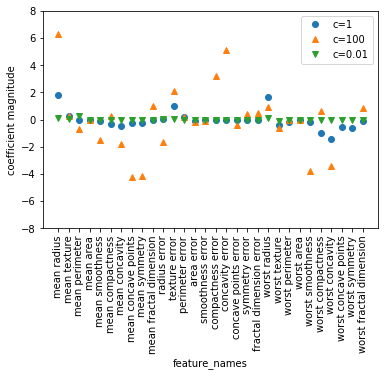

In [19]:
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target,
                                                    stratify=canser.target, random_state=1)

logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))
print('Number of features used:', np.sum(logreg.coef_ != 0))
print('='*40)

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))
print('='*40)

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))
print('='*40)

plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label='c=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.01')
plt.xticks(range(canser.data.shape[1]), canser.feature_names, rotation=90)
plt.ylim(-8, 8)
plt.xlabel('feature_names')
plt.ylabel('coefficient magnitude')
plt.legend()
plt.show()

#### 换用L1正则化的逻辑回归方法

Training set score: 0.9624413145539906
Test set score: 0.9440559440559441
Number of features used: 11
Training set score: 0.9906103286384976
Test set score: 0.972027972027972
Training set score: 0.9154929577464789
Test set score: 0.9300699300699301


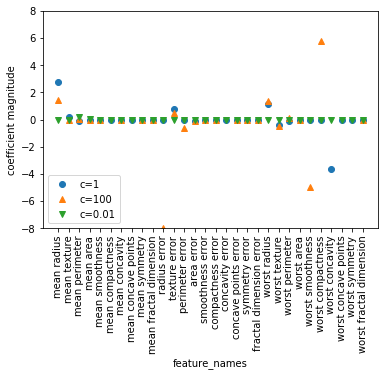

In [20]:
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target,
                                                    stratify=canser.target, random_state=1)

logreg = LogisticRegression(penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))
print('Number of features used:', np.sum(logreg.coef_ != 0))
print('='*40)

logreg100 = LogisticRegression(C=100, penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))
print('='*40)

logreg001 = LogisticRegression(C=0.01, penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))
print('='*40)

plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label='c=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.01')
plt.xticks(range(canser.data.shape[1]), canser.feature_names, rotation=90)
plt.ylim(-8, 8)
plt.xlabel('feature_names')
plt.ylabel('coefficient magnitude')
plt.legend()
plt.show()

### 多分类方法实现

导入三分类数据集

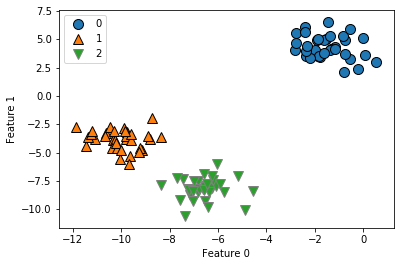

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

使用 One vs. Rest 训练线性分类器

In [22]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

print('Coefficient shape:', linear_svm.coef_)
print('Intercept shape:', linear_svm.intercept_)

Coefficient shape: [[ 0.04258887  0.38388146]
 [-0.47452576  0.17317392]
 [ 0.48006805 -0.62855151]]
Intercept shape: [ 0.14391865 -2.85329747  0.05646793]


可视化训练好的三条直线

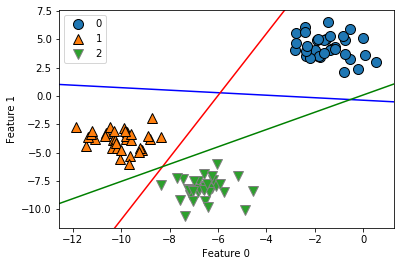

In [23]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# plt.ylim(-10, 15)
# plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

绘制决策边界

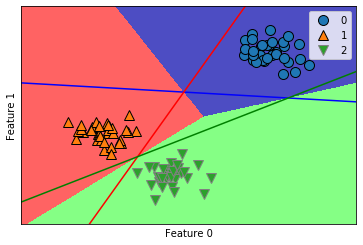

In [24]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

## 贝叶斯分类器

**GaussianNB**, **BernoulliNB**, **MultinomialNB**

In [25]:
# Bernoullib 统计每个特征中每个类别不为0的个数
import numpy as np

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)

print('Feature counts:\n', counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 决策树

### 决策树例子

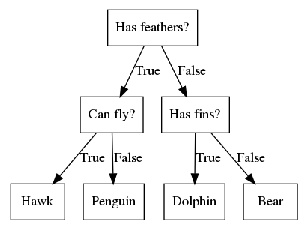

In [26]:
mglearn.plots.plot_animal_tree()

### 决策树解决乳腺癌分类

In [27]:
from sklearn.tree import DecisionTreeClassifier

canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target,
                                                    stratify=canser.target, random_state=42)

# 不使用预剪枝，模型容易过拟合
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print('decision tree:')
print('accuracy on training set:', tree.score(X_train, y_train))
print('accuracy on test set:', tree.score(X_test, y_test))
print('=' * 40)

tree1 = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)
print('decision tree with max depth 4:')
print('accuracy on training set:', tree1.score(X_train, y_train))
print('accuracy on test set:', tree1.score(X_test, y_test))
print('=' * 40)

decision tree:
accuracy on training set: 1.0
accuracy on test set: 0.9370629370629371
decision tree with max depth 4:
accuracy on training set: 0.9882629107981221
accuracy on test set: 0.951048951048951


### 导出决策树，将其可视化

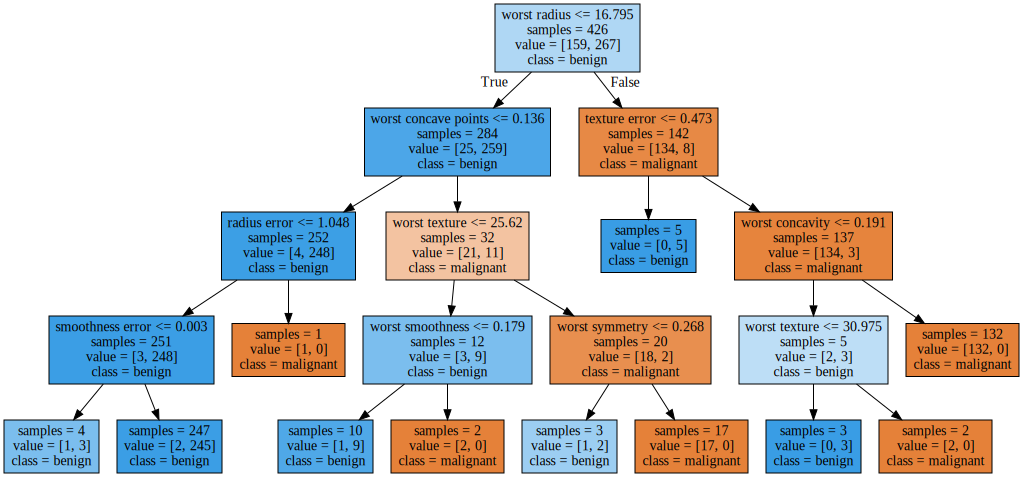

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree1, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=canser.feature_names, impurity=False, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 查看与可视化特征重要性

Feature importance :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


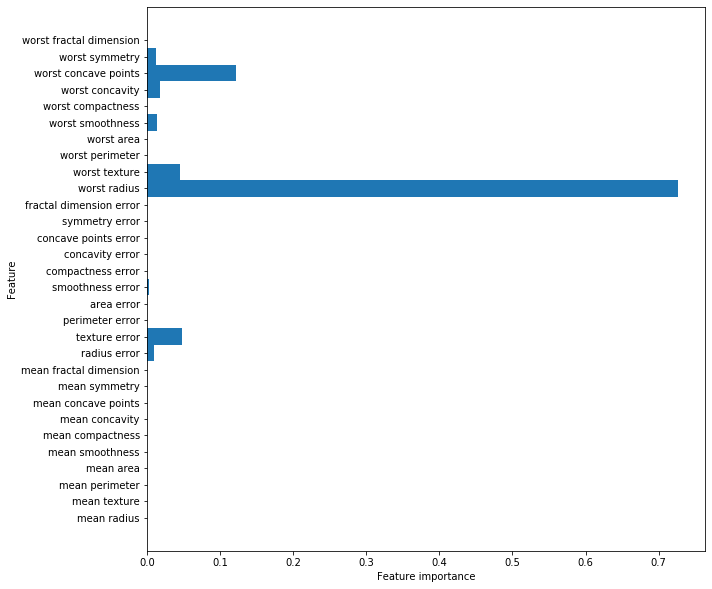

In [29]:
print('Feature importance :\n', tree1.feature_importances_)

def plot_importances_canser(model):
    n_features = canser.data.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center', height=1 )
    plt.yticks(range(n_features), canser.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_importances_canser(tree1)

### 决策树处理回归问题时，不能外推

#### 加载内存价格数据集

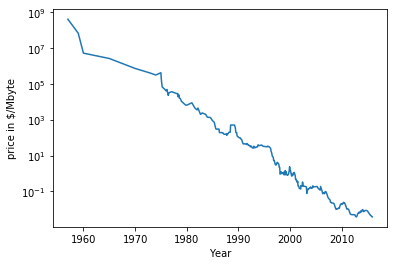

In [30]:
import pandas as pd

ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)

plt.xlabel('Year')
plt.ylabel('price in $/Mbyte')
plt.show()

#### 使用决策树回归与线性回归预测

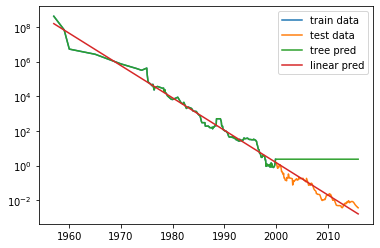

In [31]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date > 2000]

# 基于日期预测价格
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 对所有数据进行预测
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree pred')
plt.semilogy(ram_prices.date, price_lr, label='linear pred')

plt.legend()


## 决策树集成

### 随机森林

解决部分数据上的过拟合：构造多个不同决策树，结果取平均

构造决策树策略：
-  bootstrap 获取多个不同的训练样本
- 每个样本选取不同的训练特征

#### 随机森林解决分类

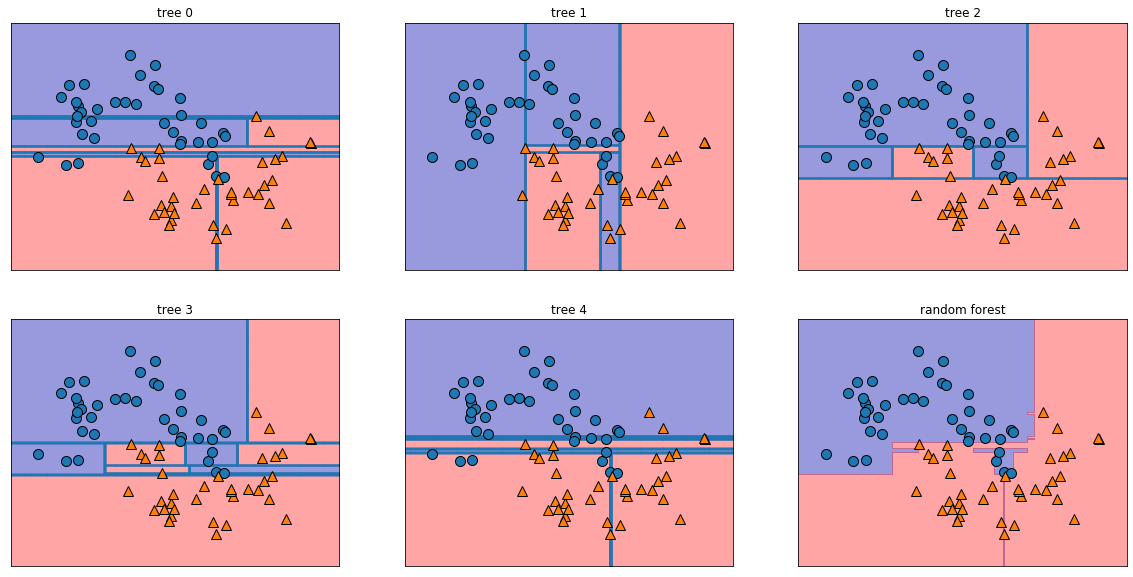

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# 构造包括5棵树的随机森林
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2,3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.show()

#### 随机森林应用于乳腺癌数据集

Accuracy of trainning set 1.0
Accuracy of test set 0.972027972027972


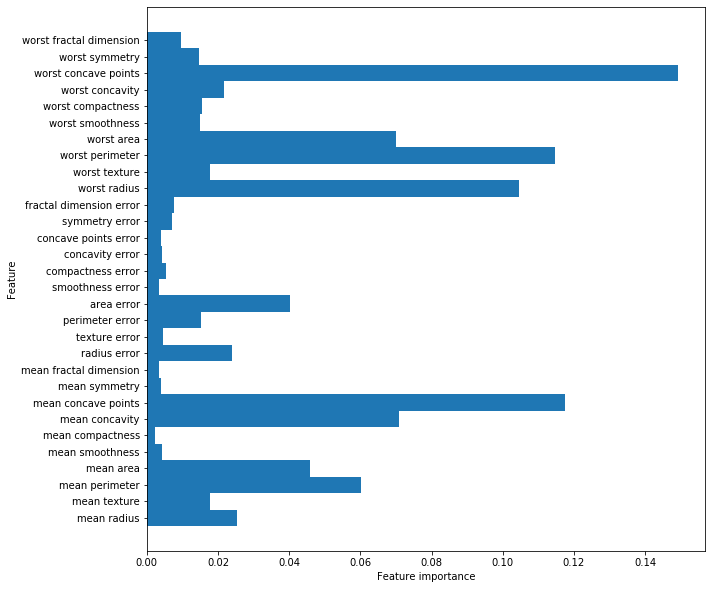

In [33]:
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=0)

forest.fit(X_train, y_train)

print('Accuracy of trainning set', forest.score(X_train, y_train))
print('Accuracy of test set', forest.score(X_test, y_test))

plot_importances_canser(forest)

### 梯度提升回归树

思路：连续构造树，后一颗以一定学习率纠正前一颗的错误

#### 预测乳腺癌数据

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print('Accuracy of trainning set', gbrt.score(X_train, y_train))
print('Accuracy of test set', gbrt.score(X_test, y_test))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print('Accuracy of trainning set', gbrt.score(X_train, y_train))
print('Accuracy of test set', gbrt.score(X_test, y_test))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print('Accuracy of trainning set', gbrt.score(X_train, y_train))
print('Accuracy of test set', gbrt.score(X_test, y_test))

Accuracy of trainning set 1.0
Accuracy of test set 0.965034965034965
Accuracy of trainning set 0.9906103286384976
Accuracy of test set 0.972027972027972
Accuracy of trainning set 0.9882629107981221
Accuracy of test set 0.965034965034965


## 核支持向量机

### 线性模型与非线性特征

#### 不是线性可分的场景

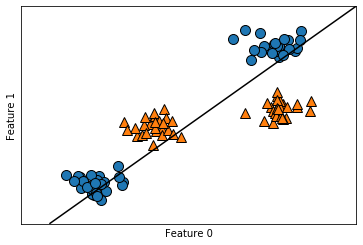

In [35]:
from sklearn.svm import LinearSVC

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

#### 引入新特征 Feature 1 ^ 2 进行线性分类

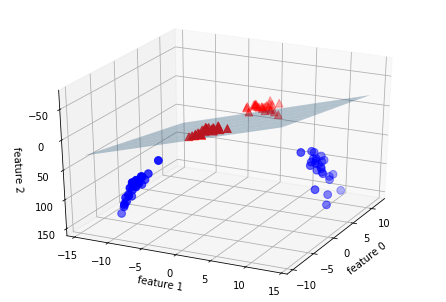

In [36]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

# 使用X[:, 1:] 或 X[:, 1:2] 而不使用X[:, 1]是为了保持数据维数
X_new = np.hstack([X, X[:, 1:] ** 2])

linear_svm_3d = LinearSVC().fit(X_new, y)

coef, interc = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()

# 3D 可视化
ax = Axes3D(figure, elev=-152, azim=-26)

# 绘制决策面
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')
plt.show()

#### 分析分类边界

Text(0, 0.5, 'Feature 1')

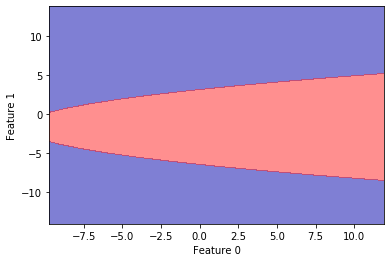

In [37]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 核支持向量机

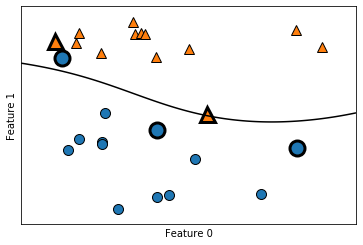

In [41]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 画出支持向量

sv = svm.support_vectors_

# 支持向量的类别标签由dual_coef_的正负号给出

sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

#### 核方法参数选择

gamma：控制高斯核的宽度，数值越小，高斯核的半径越大，模型越简单  
C:正则化参数, C越小，正则话程度越高， 模型越简单

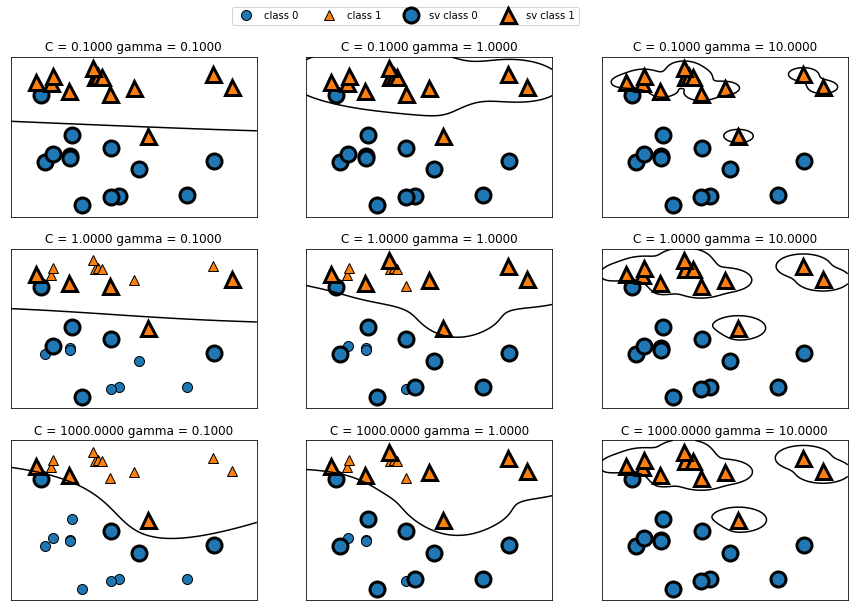

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(0.9, 1.2))
plt.show()

#### 使用核方法预测乳腺癌数据

直接使用高斯核预测

In [49]:
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=0)

# 默认使用rbf核，C=1， gamma=1/n_features
svc = SVC().fit(X_train, y_train)

print('accuracy of trainning set', svc.score(X_train, y_train))
print('accuracy of test set', svc.score(X_test, y_test))

accuracy of trainning set 1.0
accuracy of test set 0.6293706293706294


分析不同特征分布

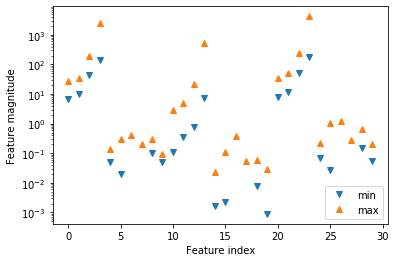

In [53]:
plt.plot(X_train.min(axis=0),'v', label='min')
plt.plot(X_train.max(axis=0),'^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale('log')
plt.show()

特征放缩

In [111]:
# 计算特征最小值， 最大值
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=0)
min_on_trainning = X_train.min(axis=0)
max_on_trainning = X_train.max(axis=0)

# 计算特征范围
range_on_training = max_on_trainning - min_on_trainning

X_train_scaled = (X_train - min_on_trainning) / range_on_training
X_test_scaled = (X_test - min_on_trainning) / range_on_training

训练 SVC

In [112]:
# 默认使用rbf核，C=1， gamma=1/n_features
svc = SVC().fit(X_train_scaled, y_train)

print('accuracy of trainning set', svc.score(X_train_scaled, y_train))
print('accuracy of test set', svc.score(X_test_scaled, y_test))

accuracy of trainning set 0.9483568075117371
accuracy of test set 0.951048951048951


提高模型复杂度

In [113]:
svc = SVC(gamma=2, C=10).fit(X_train_scaled, y_train)

print('accuracy of trainning set', svc.score(X_train_scaled, y_train))
print('accuracy of test set', svc.score(X_test_scaled, y_test))

accuracy of trainning set 0.9882629107981221
accuracy of test set 0.986013986013986
